In [8]:
# !~/bin/nbsetup
import pyqg
import numpy as np
import matplotlib.pyplot as plt

# PyQG

## Testing

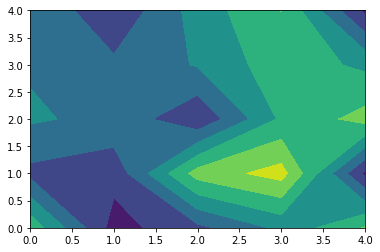

In [34]:
c = plt.contourf(np.random.rand(5,5))
f = plt.gcf()

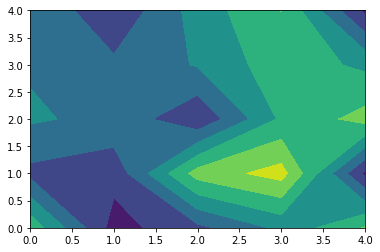

In [37]:
c.set_array(np.random.rand(5,5))
c.dr
f

## Example

In [10]:
import pyqg
year = 24*60*60*360.
m = pyqg.QGModel(tmax=10*year, twrite=10000, tavestart=5*year)
m.run()

INFO:  Logger initialized
INFO:  Kernel initialized
INFO: Step: 10000, Time: 7.20e+07, KE: 3.83e-04, CFL: 0.098
INFO: Step: 20000, Time: 1.44e+08, KE: 5.00e-04, CFL: 0.092
INFO: Step: 30000, Time: 2.16e+08, KE: 5.05e-04, CFL: 0.092
INFO: Step: 40000, Time: 2.88e+08, KE: 4.66e-04, CFL: 0.088


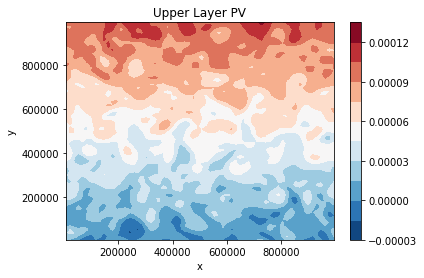

In [13]:
q_upper = m.q[0] + m.Qy[0]*m.y
plt.contourf(m.x, m.y, q_upper, 12, cmap='RdBu_r')
plt.xlabel('x'); plt.ylabel('y'); plt.title('Upper Layer PV')
plt.colorbar();

In [22]:
m.get_diagnostic('KEspec').shape

(2, 64, 33)

In [29]:
m.k.shape, m.l.shape

((64, 33), (64, 33))

In [27]:
m.describe_diagnostics()

NAME               | DESCRIPTION
--------------------------------------------------------------------------------
{:<10} | {:<54}


AttributeError: 'NoneType' object has no attribute 'format'

/project2/rossby/group07/.conda/lib/python2.7/site-packages/matplotlib/axes/_base.py:3129: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '


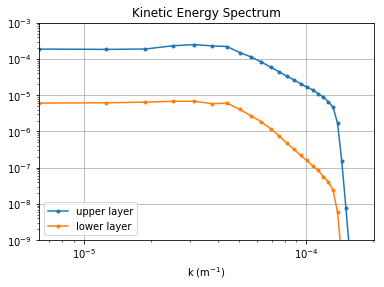

In [16]:
kespec_u = m.get_diagnostic('KEspec')[0].sum(axis=0)
kespec_l = m.get_diagnostic('KEspec')[1].sum(axis=0)
plt.loglog( m.kk, kespec_u, '.-' )
plt.loglog( m.kk, kespec_l, '.-' )
plt.legend(['upper layer','lower layer'], loc='lower left')
plt.ylim([1e-9,1e-3]); plt.xlim([m.kk.min(), m.kk.max()])
plt.xlabel(r'k (m$^{-1}$)'); plt.grid()
plt.title('Kinetic Energy Spectrum');

In [17]:
ls

analysis/             pyqg_pip/
build.sh*             reconfigure_2layer_QG-Copy1.ipynb
data/                 reconfigure_2layer_QG-Copy2.ipynb
functions/            reconfigure_2layer_QG.ipynb*
notebook_davis.ipynb  setup.py
pyqg_mod/             start_remote_notebook.sh*


## Testing custom module

In [4]:
import pyqg_mod
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
m = pyqg_mod.QGModel(dt=1, tmax=10, rek_anom=0.0)
m.run()

INFO:  Logger initialized


Setting up cartesian Rek.
[[5.78703704e-07 5.78703704e-07 5.78703704e-07 ... 5.78703704e-07
  5.78703704e-07 5.78703704e-07]
 [5.78703704e-07 5.78703704e-07 5.78703704e-07 ... 5.78703704e-07
  5.78703704e-07 5.78703704e-07]
 [5.78703704e-07 5.78703704e-07 5.78703704e-07 ... 5.78703704e-07
  5.78703704e-07 5.78703704e-07]
 ...
 [5.78703704e-07 5.78703704e-07 5.78703704e-07 ... 5.78703704e-07
  5.78703704e-07 5.78703704e-07]
 [5.78703704e-07 5.78703704e-07 5.78703704e-07 ... 5.78703704e-07
  5.78703704e-07 5.78703704e-07]
 [5.78703704e-07 5.78703704e-07 5.78703704e-07 ... 5.78703704e-07
  5.78703704e-07 5.78703704e-07]]


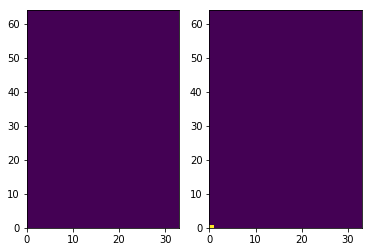

In [6]:
f, ax = plt.subplots(ncols=2)
p = ax[0].pcolor(m.rekh[1].imag[0:,0:])
p = ax[1].pcolor(m.rekh[1].real[0:,0:])

In [7]:
m.rek[1,0,0], m.rekh[1].real[0,0]

(5.787037037037037e-07, 0.0023703703703703703)

In [53]:
m.rek.max()

5.787037037037037e-07

In [30]:
m.rekh[1][6,0]

(-2.172194359220951e-06+9.583083854271089e-21j)

# Noboru

## First

In [ ]:
dir = '/project2/midway/rossby'